In [2]:
# Se importan las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Se especifica la localización de los graficos en los contenedores
%matplotlib inline

# Se carga el fichero
tweets = pd.read_json('./datos_TW/_UEMC_M4.json')


In [3]:
# Vemos una pequeña muestra para ver que se ha cargado el fichero
tweets.head(5)

,contador_caracteres,contador_palabras,creado,fuentes,localizacion,seguidores,texto,usuario
0,139,14,Mon Dec 25 23:43:15 +0000 2017,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",United States,1054,RT @precisionclass: Distributing control of #D...,EntrepreneurEva
1,96,13,Mon Dec 25 23:43:15 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",South korea,126,RT @thelorddlee: Check out 'Nasty' by Davon D....,hjtop83
2,111,11,Mon Dec 25 23:43:15 +0000 2017,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,600,【LSK】ビットフライヤー上場の噂はソースがなくガセらしい。 https://t.co/oh...,bitcoinfinancen
3,138,20,Mon Dec 25 23:43:16 +0000 2017,"<a href=""http://twitter.com/download/iphone"" r...","London, England",2230,RT @Coinfirm_io: A Xmas review of our @AMLT_To...,TeamBlockchain
4,140,14,Mon Dec 25 23:43:16 +0000 2017,"<a href=""http://twitter.com/download/android"" ...",None,0,RT @craigbrownphd: #FinTech #DeepLearning #Clo...,carylonbadawi11


In [4]:
# Se crea el campo hora y el campo Booleano para saber si es un RT
tweets.creado = pd.to_datetime(tweets.creado)
tweets['hour'] = tweets.creado.dt.hour
tweets['RT'] = tweets.apply(lambda x: 'RT' in x['texto'], axis=1)

# Se extraen los hashtags
def hash_set(texto):
    if '#Blockchain' in texto:
        return 'Blockchain'
    elif '#Bitcoin' in texto:
        return 'Bitcoin'
    elif '#Stocks' in texto:
        return 'Stocks'
    elif '#Cryptomoneda' in texto:
        return 'Cryptomoneda'
    elif '#Coinbase' in texto:
        return 'Coinbase'
    elif '#Ethereum' in texto:
        return 'Ethereum'
    else:
        return '---'
    
tweets['hashtag'] = tweets.texto.apply(func = hash_set)

In [5]:
# Vemos una pequeña muestra para ver que se ha cargado el fichero
tweets.head(5)

,contador_caracteres,contador_palabras,creado,fuentes,localizacion,seguidores,texto,usuario,hour,RT,hashtag
0,139,14,2017-12-25 23:43:15,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",United States,1054,RT @precisionclass: Distributing control of #D...,EntrepreneurEva,23,True,---
1,96,13,2017-12-25 23:43:15,"<a href=""http://twitter.com/download/android"" ...",South korea,126,RT @thelorddlee: Check out 'Nasty' by Davon D....,hjtop83,23,True,---
2,111,11,2017-12-25 23:43:15,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,600,【LSK】ビットフライヤー上場の噂はソースがなくガセらしい。 https://t.co/oh...,bitcoinfinancen,23,False,---
3,138,20,2017-12-25 23:43:16,"<a href=""http://twitter.com/download/iphone"" r...","London, England",2230,RT @Coinfirm_io: A Xmas review of our @AMLT_To...,TeamBlockchain,23,True,---
4,140,14,2017-12-25 23:43:16,"<a href=""http://twitter.com/download/android"" ...",None,0,RT @craigbrownphd: #FinTech #DeepLearning #Clo...,carylonbadawi11,23,True,---


In [6]:
# Se extraen las fuentes
def hash_set(fuentes):
    if 'rel=\"nofollow\">IFTTT<' in fuentes:
        return 'IFTTT'
    elif 'rel=\"nofollow\">Twitter Web Client<' in fuentes:
        return 'Cliente Web'
    elif 'rel=\"nofollow\">Twitter for Android<' in fuentes:
        return 'Android'
    elif 'rel=\"nofollow\">Twitter for Mac<' in fuentes:
        return 'Mac'
    elif 'rel=\"nofollow\">Twitter Lite<' in fuentes:
        return 'Movil/Ipad'
    elif 'rel=\"nofollow\">Twitter for BlackBerry<' in fuentes:
        return 'BlackBerry'
    elif 'rel=\"nofollow\">Twitter for iPhone<' in fuentes:
        return 'iPhone'
    elif 'Paper.li' in fuentes:
        return 'Paper.li'
    else:
        return 'Otros'
    
tweets['dispositivo'] = tweets.fuentes.apply(func = hash_set)

In [7]:
# Se observan estadísticas del DataFrame
tweets.describe()

,contador_caracteres,contador_palabras,seguidores,hour
count,57520.000000,57520.000000,5.752000e+04,57520.000000
mean,129.333727,16.595167,4.886965e+03,4.173331
std,21.846588,4.801009,4.135458e+04,4.284815
min,8.000000,1.000000,0.000000e+00,0.000000
25%,131.000000,14.000000,1.160000e+02,2.000000
50%,140.000000,17.000000,8.310000e+02,4.000000
75%,140.000000,20.000000,1.777000e+03,6.000000
max,158.000000,32.000000,2.879187e+06,23.000000


In [9]:
# Función para saber el número máximo de caracteres
def long_max(self):
    """
    Método para obtener la media de la longitud de los tweets
    :return: valor medio del total de palabras
    """
    maxi = np.max(tweets['contador_palabras'])
    print('La longitud max de los tweets es: {:.0f} caracteres'
          .format(maxi))
long_max(tweets['contador_palabras'])

La longitud max de los tweets es: 32 caracteres


In [10]:
# Función para saber el número mínimo de caracteres
def long_min(self):
    """
    Método para obtener la media de la longitud de los tweets
    :return: valor medio del total de palabras
    """
    mini = np.min(tweets['contador_palabras'])
    print('La longitud min de los tweets es: {:.0f} caracteres'
          .format(mini))
long_min(tweets['contador_palabras'])

La longitud min de los tweets es: 1 caracteres


In [11]:
# Función para saber el número medio de caracteres
def long_media(self):
    """
    Método para obtener la media de la longitud de los tweets
    :return: valor medio del total de palabras
    """
    media = np.mean(tweets['contador_palabras'])
    print('La longitud media de los tweets es: {:.0f} caracteres'
          .format(media))
long_media(tweets['contador_palabras'])

La longitud media de los tweets es: 17 caracteres


In [16]:
#Vemos el número de tweets obtenido por cada hora 
counts = tweets[['hour', 'texto']].groupby('hour').agg('count')
counts_sorted = counts.sort_values(by='texto', ascending=False)
counts_sorted.transpose()

hour,5,3,6,4,0,2,1,7,23
texto,7571,7450,7147,7094,7075,6836,6559,5673,2115


True     0.697253
False    0.302747
Name: RT, dtype: float64


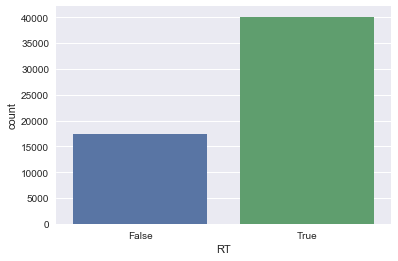

In [17]:
#Se hace una pequeña comparación para ver el número de Rts que hubo
sns.countplot(tweets.RT, label="Count")
print(tweets.RT.value_counts(normalize=True))

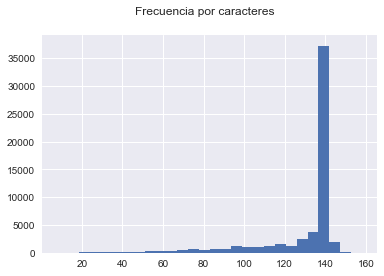

In [18]:
#Se hace un pequeño estudio sobre cual ha sido la distribución por el número de caracteres
plt.suptitle('Frecuencia por caracteres')
hist_chars = tweets.contador_caracteres.hist(bins=28)

---           0.783049
Bitcoin       0.143724
Blockchain    0.049896
Ethereum      0.016499
Stocks        0.005772
Coinbase      0.001061
Name: hashtag, dtype: float64


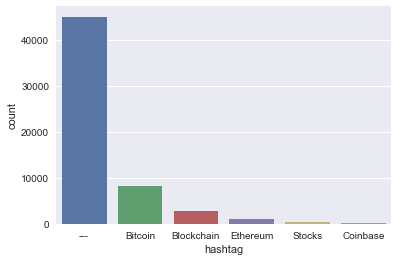

In [19]:
#Se estudia ahora la distribución de los hashtags dentro de los tweets
sns.countplot(tweets.hashtag,label="Count", order = tweets.hashtag.value_counts().index) 
print(tweets.hashtag.value_counts(normalize=True))

In [20]:
#Se desempeña otro estudio con la finalidad de obtener desde que plataformas se han generado los tweets más largos
counts = tweets[['dispositivo', 'contador_caracteres']].groupby('dispositivo').agg('max')
counts_sorted = counts.sort_values(by='contador_caracteres', ascending=False)
counts_sorted.transpose()

dispositivo,iPhone,Otros,Cliente Web,Android,IFTTT,Movil/Ipad,Paper.li,BlackBerry,Mac
contador_caracteres,158,157,152,150,148,148,141,140,140


In [22]:
#Se visualiza desde que plataformas se han generado el número máximo de tweets
counts = tweets[['dispositivo', 'contador_caracteres']].groupby('dispositivo').agg('count')
counts_sorted = counts.sort_values(by='contador_caracteres', ascending=False)
counts_sorted.transpose()

dispositivo,Cliente Web,Otros,Android,iPhone,IFTTT,Movil/Ipad,Paper.li,Mac,BlackBerry
contador_caracteres,24275,11537,9826,6277,3812,1418,349,19,7


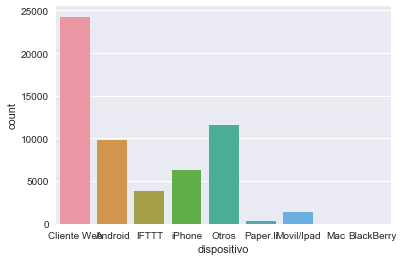

In [23]:
sns.countplot(tweets.dispositivo)